In [1]:
from sklearn.datasets import load_svmlight_file
from optimization import barrier_method_lasso
from oracles import BarrierMethodLassoOracle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(45)

def generate_data(dim, cnt):
    A = []
    for _ in range(cnt):
        A.append(np.random.rand(dim) * 10 - 5)
    b =  np.random.rand(cnt)
    return np.array(A), b
epsilon = 0.01

In [20]:
ns = [10, 50, 100, 500, 1000]
ms = [500, 1500, 2500, 3500, 4500 ,5500]
lambdas = [0.1, 1, 10, 100]
cmap = plt.get_cmap('tab10')

c:\Users\hkl19\Desktop\optlab3\oracles.py:64: RuntimeWarning: invalid value encountered in log
  barrier_value = -np.sum(np.log(u + x)) - np.sum(np.log(u - x))


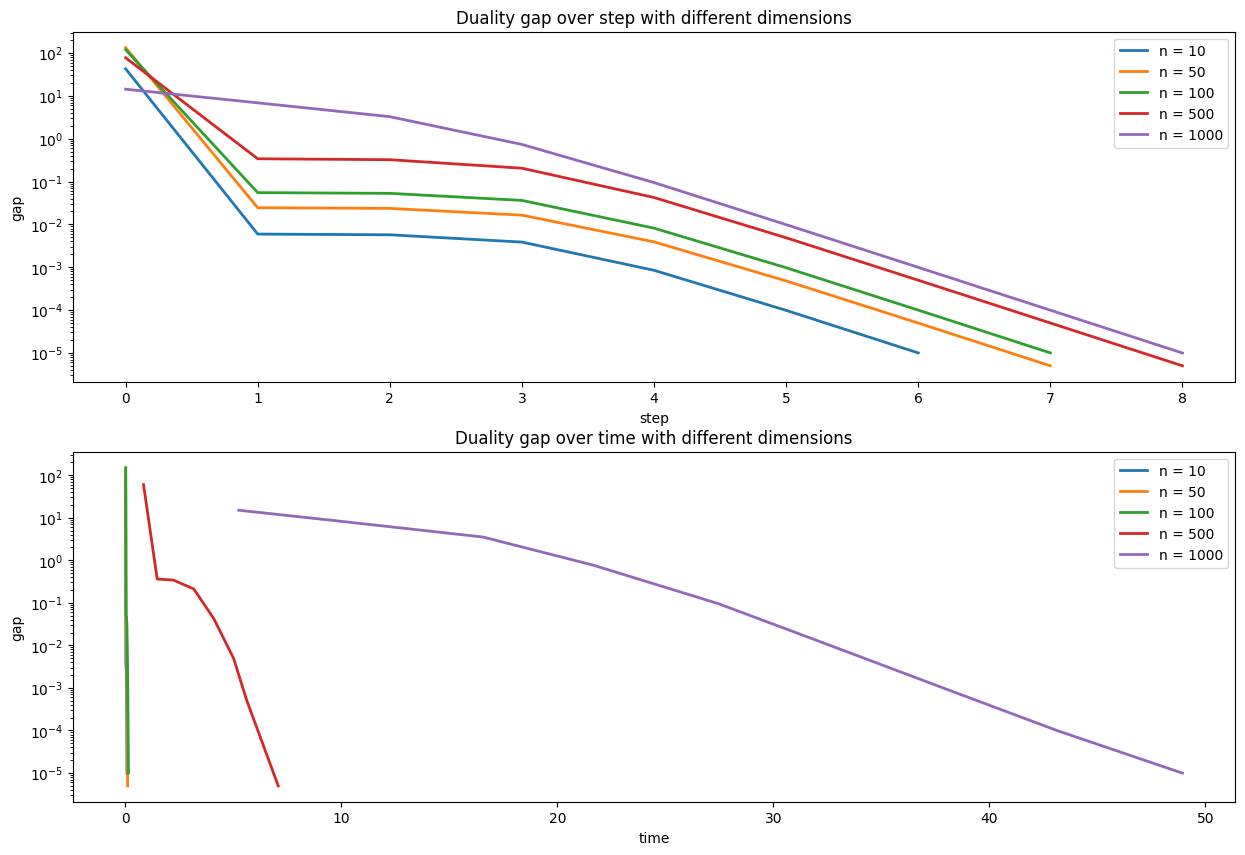

In [14]:
_, axs = plt.subplots(2, 1, figsize=(15, 10))
m = 1000
plt.sca(axs[0])
for i,n in enumerate(ns):
    A, b = generate_data(n, m)
    x_0 = np.ones(A.shape[1])*5
    _, _, history = barrier_method_lasso(A, b, 0.1, x_0, x_0+epsilon, trace=True)
    plt.plot(np.arange(len(history['duality_gap'])), history['duality_gap'], color=cmap(i), linewidth=2, label='n = ' + str(n))
plt.xlabel('step')
plt.ylabel('gap')
plt.title('Duality gap over step with different dimensions')
plt.legend()
plt.yscale('log')

m = 1000
plt.sca(axs[1])
for i,n in enumerate(ns):
    A, b = generate_data(n, m)
    x_0 = np.ones(A.shape[1])*5
    _, _, history = barrier_method_lasso(A, b, 0.1, x_0, x_0+epsilon, trace=True)
    plt.plot(history['time'], history['duality_gap'], color=cmap(i), linewidth=2, label='n = ' + str(n))
plt.xlabel('time')
plt.ylabel('gap')
plt.title('Duality gap over time with different dimensions')
plt.legend()
plt.yscale('log')
plt.show()

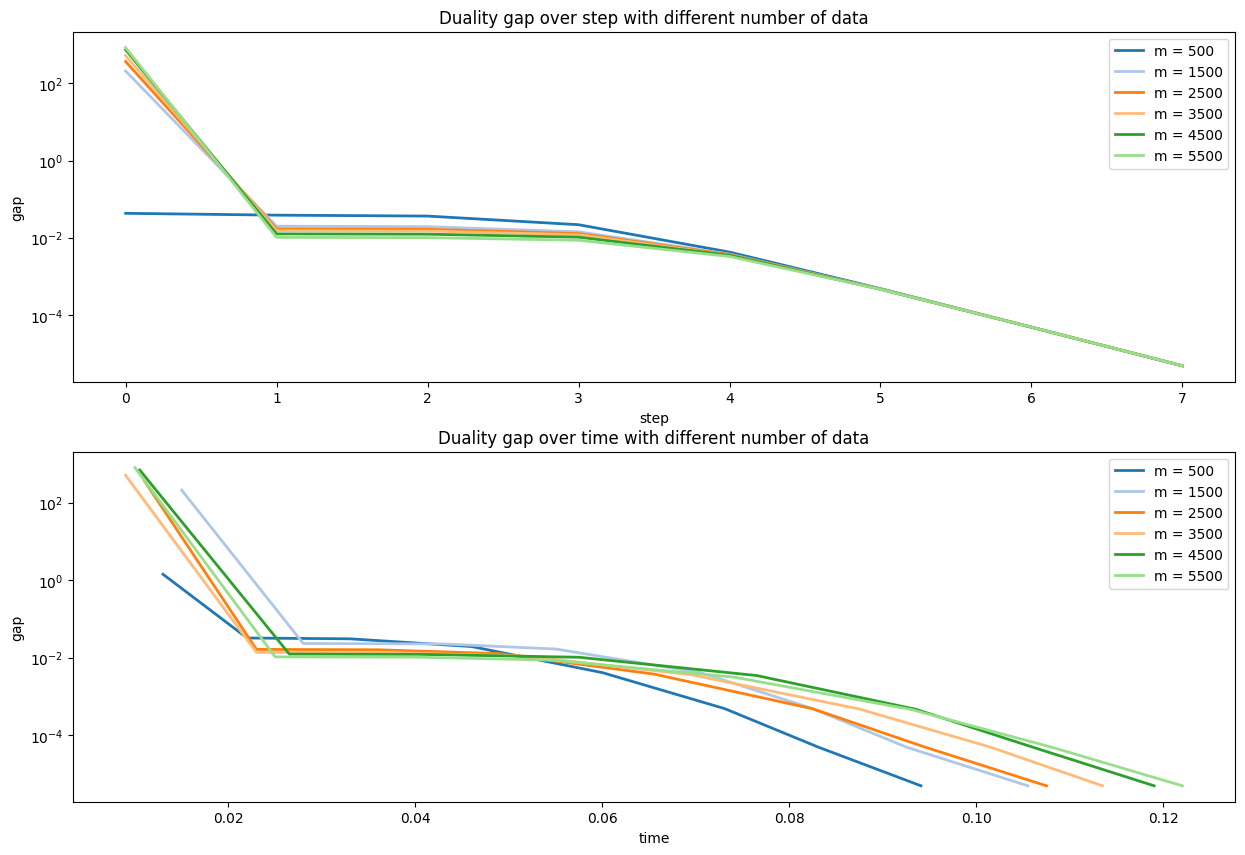

In [22]:
_, axs = plt.subplots(2, 1, figsize=(15, 10))
n = 50
cmap = plt.get_cmap('tab20')

plt.sca(axs[0])
for i,m in enumerate(ms):
    A, b = generate_data(n, m)
    x_0 = np.ones(A.shape[1])*5
    _, _, history = barrier_method_lasso(A, b, 0.1, x_0, x_0+epsilon, trace=True)
    plt.plot(np.arange(len(history['duality_gap'])), history['duality_gap'], color=cmap(i), linewidth=2, label='m = ' + str(m))
plt.xlabel('step')
plt.ylabel('gap')
plt.title('Duality gap over step with different number of data')
plt.legend()
plt.yscale('log')

plt.sca(axs[1])
for i,m in enumerate(ms):
    A, b = generate_data(n, m)
    x_0 = np.ones(A.shape[1])*5
    _, _, history = barrier_method_lasso(A, b, 0.1, x_0, x_0+epsilon, trace=True)
    plt.plot(history['time'], history['duality_gap'], color=cmap(i), linewidth=2, label='m = ' + str(m))
plt.xlabel('time')
plt.ylabel('gap')
plt.title('Duality gap over time with different number of data')
plt.legend()
plt.yscale('log')

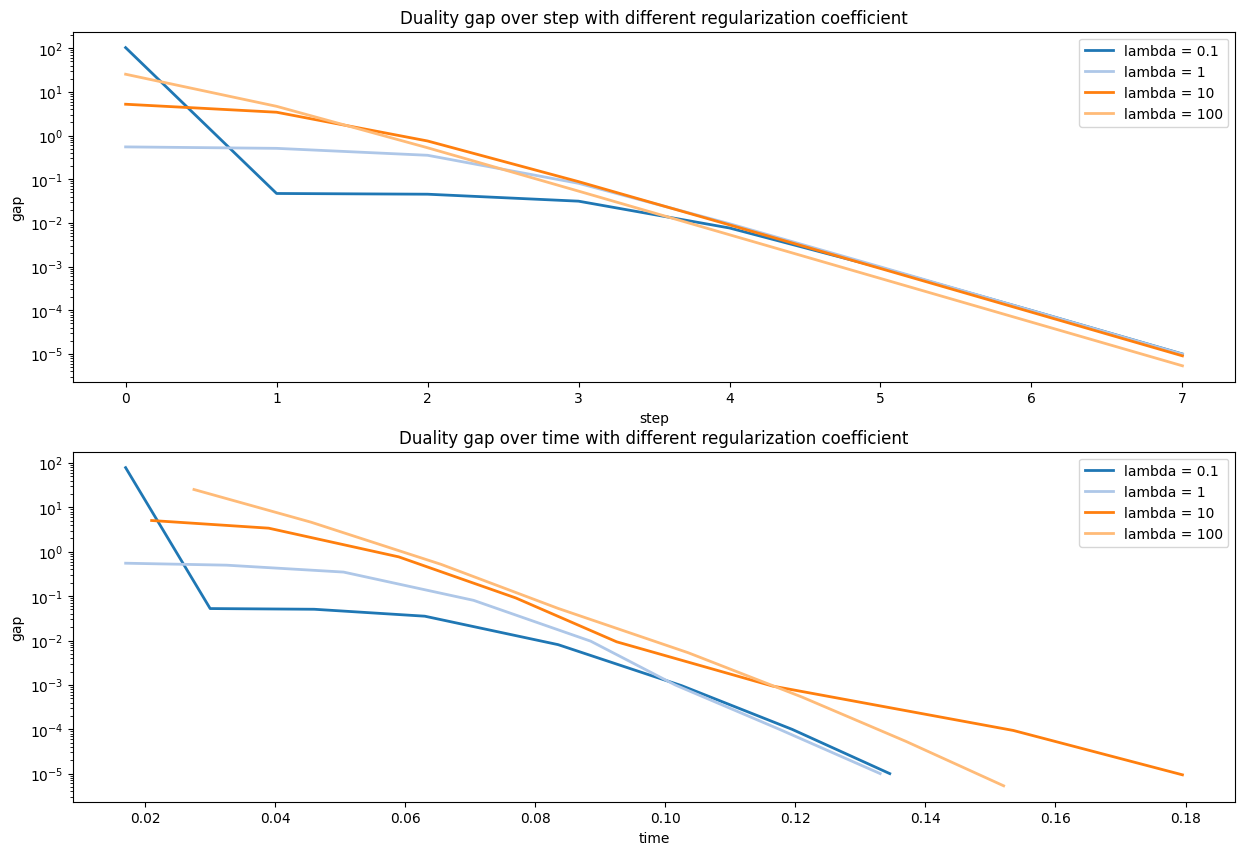

In [25]:
_, axs = plt.subplots(2, 1, figsize=(15, 10))
n=100
m=1000

plt.sca(axs[0])
for i,lambda_ in enumerate(lambdas):
    A, b = generate_data(n, m)
    x_0 = np.ones(A.shape[1])*5
    _, _, history = barrier_method_lasso(A, b, lambda_, x_0, x_0+epsilon, trace=True)
    plt.plot(np.arange(len(history['duality_gap'])), history['duality_gap'], color=cmap(i), linewidth=2, label='lambda = ' + str(lambda_))
plt.xlabel('step')
plt.ylabel('gap')
plt.title('Duality gap over step with different regularization coefficient')
plt.legend()
plt.yscale('log')

plt.sca(axs[1])
for i,lambda_ in enumerate(lambdas):
    A, b = generate_data(n, m)
    x_0 = np.ones(A.shape[1])*5
    _, _, history = barrier_method_lasso(A, b, lambda_, x_0, x_0+epsilon, trace=True)
    plt.plot(history['time'], history['duality_gap'], color=cmap(i), linewidth=2, label='lambda = ' + str(lambda_))
plt.xlabel('time')
plt.ylabel('gap')
plt.title('Duality gap over time with different regularization coefficient')
plt.legend()
plt.yscale('log')